In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import sys
sys.path.append("..")
sys.path.append("../shared")

import bartolozziSPEED

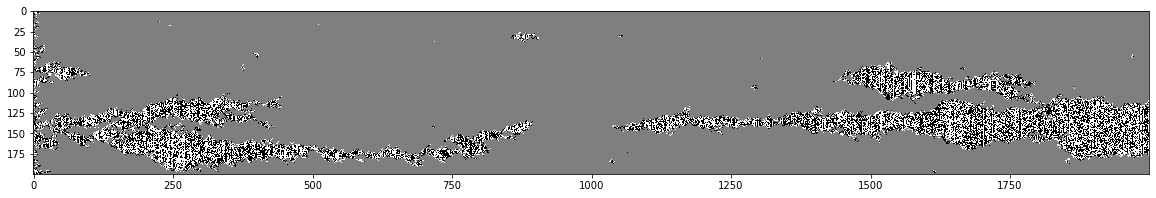

In [2]:
np.random.seed(1)
random.seed(1)

G, x = bartolozziSPEED.generate(.47,.0001,.5,.5,2000,200,2,1,.001)

plt.figure(figsize=(20,3))
plt.imshow(G.T, cmap="binary", aspect="auto", interpolation="None")

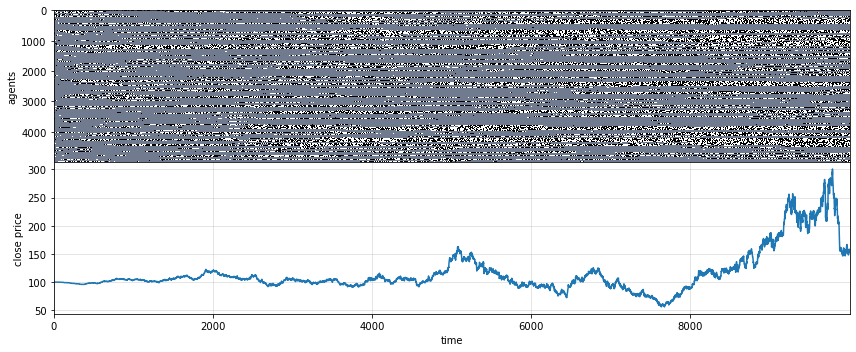

In [26]:
N0 = 10000 # timepoints
N1 = 5000 # granulization of the grid / agents

pd = 0.05 
pe = 0.0001
ph = 0.0485

pa = 0.2

A = 1.8
a = 2*A
h = 0

G, x = bartolozziSPEED.generate(pd, pe, ph, pa, N0, N1, A, a, h)

fig, (ax1, ax2) = plt.subplots(
    ncols=1, nrows=2, figsize=(12,5), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0}
)
ax1.imshow(G.T, cmap="bone", interpolation="None", aspect="auto")
# plt.colorbar()

r = (x - np.mean(x)) / np.std(x)

s = 100
S = np.zeros_like(x)
S[0] = s
for i in range(1,N0):
    # S[i] = S[i-1] + (S[i-1] * r[i])
    S[i] = S[i-1] + (S[i-1] * r[i]/100) + 0.01

ax2.plot(S)
ax2.grid(alpha=0.4)

ax2.set_xlabel("time")
ax2.set_ylabel("close price")
ax1.set_ylabel("agents")

plt.tight_layout()
plt.show()

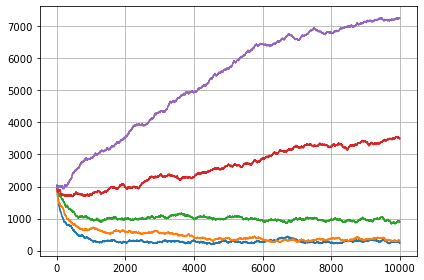

In [32]:
N0 = 10000 # timepoints
N1 = 10000 # granulization of the grid / agents

pd = 0.05 
pe = 0.0001
# ph = 0.0485

pa = 0.2

A = 1.8
a = 2*A
h = 0

p_h_vals = np.linspace(0.04, 0.05, 5)

fig, ax = plt.subplots() 

for ph in p_h_vals:
    G, x = bartolozziSPEED.generate(pd, pe, ph, pa, N0, N1, A, a, h)
    ax.plot(np.count_nonzero(G, axis=1))

plt.grid()
plt.tight_layout()
plt.show()

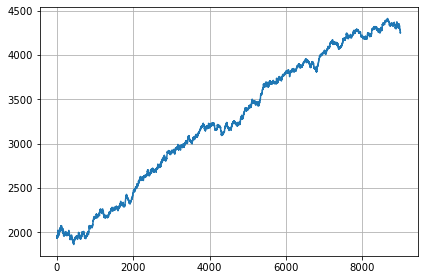

In [102]:
N0 = 9000 # timepoints
N1 = 10000 # granulization of the grid / agents

pd = 0.05 
pe = 0.0001
ph = 0.0485

pa = 0.2

A = 4
a = 2*A
h = 0

fig, ax = plt.subplots() 

G, x = bartolozziSPEED.generate(pd, pe, ph, pa, N0, N1, A, a, h)
ax.plot(np.count_nonzero(G, axis=1))

plt.grid()
plt.tight_layout()
plt.show()

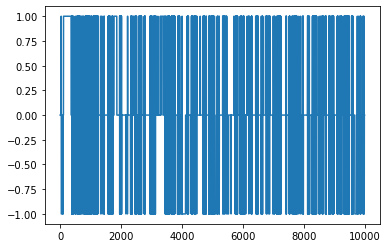

In [106]:
G_9000 = G[-1,:]
plt.plot(G_9000)

In [108]:
import itertools
import operator
clusters = [[i for i,value in it] for key,it in itertools.groupby(enumerate(G_9000), key=operator.itemgetter(1)) if key != 0]

In [109]:
print(clusters)

[[31], [34], [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88], [94], [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26

In [110]:
cluster_size = []
for i in range(len(clusters)):
    cluster_size.append(len(clusters[i]))
    
print(cluster_size)

[1, 1, 54, 1, 251, 2, 1, 3, 1, 4, 10, 1, 1, 3, 2, 3, 3, 1, 2, 1, 6, 3, 4, 6, 1, 4, 1, 1, 4, 2, 4, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 4, 4, 2, 2, 3, 4, 5, 3, 4, 1, 4, 1, 7, 1, 4, 1, 1, 12, 1, 1, 1, 3, 2, 6, 1, 2, 3, 1, 6, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 5, 1, 8, 2, 2, 1, 2, 1, 1, 2, 3, 1, 3, 1, 2, 3, 3, 2, 4, 1, 1, 2, 3, 1, 4, 1, 4, 1, 3, 1, 8, 1, 2, 2, 3, 1, 2, 1, 1, 3, 1, 1, 3, 2, 5, 1, 1, 1, 3, 3, 2, 2, 10, 1, 2, 1, 1, 2, 1, 2, 4, 6, 1, 1, 1, 3, 2, 2, 4, 2, 1, 2, 1, 1, 5, 2, 1, 6, 2, 3, 1, 2, 1, 3, 2, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 2, 3, 2, 1, 5, 2, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 2, 3, 1, 2, 1, 4, 1, 1, 1, 4, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 12, 1, 13, 1, 1, 2, 3, 3, 1, 1, 1, 1, 2, 2, 7, 2, 7, 1, 1, 1, 5, 1, 4, 1, 3, 1, 2, 1, 6, 1, 8, 1, 1, 1, 4, 4, 2, 1, 4, 1, 15, 1, 2, 2, 8, 1, 3, 1, 1, 1, 5, 92, 1, 2, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 3, 7, 1, 3, 3, 1, 1, 3, 1, 1, 4, 1, 3, 3, 1, 6, 1, 1, 2, 1, 1, 4, 5, 1, 2, 2, 1, 1, 1, 3, 1, 1, 3, 3, 5, 1, 3, 1, 2, 2, 1, 7, 1,

In [123]:
unique, counts = np.unique(cluster_size, return_counts=True)

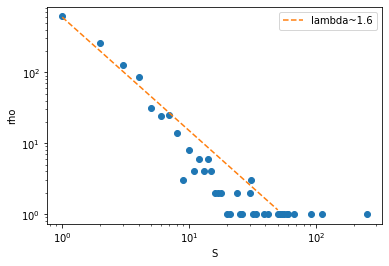

In [151]:
fig, ax = plt.subplots() 
ax.scatter(unique, counts)

power = 1.6
power_law = 600*unique[0:30]**(-power)
ax.plot(unique[0:30], power_law[0:30], color='tab:orange', label='lambda~1.6', ls='--')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('S')
ax.set_ylabel('rho')
ax.legend()